In [1]:
# project: p8
# submitter-netid: yzeng58
# partner-netid: none

In [2]:
%matplotlib inline

In [3]:
import csv
import copy 
def process_csv(filename):
    exampleFile = open(filename)
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    return exampleData
import matplotlib, pandas

def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

In [4]:
def get_mapping(path):
    file_list = process_csv(path)
    file_dict = {}
    for item in file_list:
        file_dict[item[0]] = item[1]
    return file_dict

In [5]:
#q1
sm_dict = get_mapping("small_mapping.csv")
sm_dict

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [6]:
#q2
sm_dict['tt0313542']

'Runaway Jury'

In [7]:
#q3
tt_value = []
for key in sm_dict:
    if 'tt' in key:
        tt_value.append(sm_dict[key])
tt_value

['Runaway Jury', 'Lethal Weapon']

In [8]:
#q4
Gary_keys = []
for key in sm_dict:
    if 'Gary ' in sm_dict[key]:
        Gary_keys.append(key)
Gary_keys

['nm0000997', 'nm0001219']

In [9]:
def get_raw_movies(path):
    movies = process_csv(path)
    header = movies[0]
    m_list = []
    for item in movies[1:]:
        m_dict = {}
        for i in range(len(header)):
            if header[i] == 'title':
                m_dict[header[i]] = item[i]
            elif header[i] == 'year':
                m_dict[header[i]] = int(item[i])
            elif header[i] == 'rating':
                m_dict[header[i]] = float(item[i])
            else:
                m_dict[header[i]] = item[i].split(',')
        m_list.append(m_dict)
    return m_list

In [10]:
#q5
smv_list = get_raw_movies("small_movies.csv")
smv_list

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [11]:
#q6
len(smv_list[0]['genres'])

3

In [12]:
#q7
smv_list[1]['actors'][-1]

'nm0752751'

In [13]:
def get_movies(movies_path, mapping_path):
    mv_list = get_raw_movies(movies_path)
    mp_dict = get_mapping(mapping_path)
    for item in range(len(mv_list)):
        for title in range(len(mv_list[item]['actors'])):
            mv_list[item]['actors'][title] = mp_dict[mv_list[item]['actors'][title]]
        for title in range(len(mv_list[item]['directors'])):
            mv_list[item]['directors'][title] = mp_dict[mv_list[item]['directors'][title]]
        mv_list[item]['title'] = mp_dict[mv_list[item]['title']]
    return mv_list

In [14]:
small = get_movies('small_movies.csv', 'small_mapping.csv')

In [15]:
#q8
small[0]["title"]

'Runaway Jury'

In [16]:
#q9
small[1]["directors"]

['Richard Donner']

In [17]:
#q10
small[-1]["actors"]

['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan']

In [18]:
#q11
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [19]:
movies = get_movies("movies.csv", "mapping.csv")

In [20]:
#q12
movies[:3]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']}]

In [21]:
#q13
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [22]:
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

In [23]:
#q14
filter_movies_by_year(copy.deepcopy(movies), 1930)

[{'title': 'Hook Line and Sinker',
  'year': 1930,
  'rating': 6.4,
  'directors': ['Edward F. Cline'],
  'actors': ['Bert Wheeler', 'Robert Woolsey', 'Ralf Harolde'],
  'genres': ['Comedy', 'Romance']},
 {'title': 'The Big Trail',
  'year': 1930,
  'rating': 7.2,
  'directors': ['Raoul Walsh', 'Louis R. Loeffler'],
  'actors': ['John Wayne', 'El Brendel', 'Tully Marshall'],
  'genres': ['Adventure', 'Romance', 'Western']}]

In [24]:
#q15
filter_movies_by_year(copy.deepcopy(movies), 1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [25]:
def count_uq(feature):
    genres = []
    for item in movies:
        if feature == 'title' or feature == 'year' or feature == 'rating':
            genres.append(item[feature])
        else:
            genres += item[feature]
    return [len(set(genres)),genres]

In [26]:
#q16
count_uq('genres')[0]

18

In [27]:
#q17
count_uq('actors')[0]

2605

In [28]:
#q18
count_uq('directors')[0]

1247

In [29]:
#q19
sum(count_uq('rating')[1])/len(movies)

6.401659528907912

In [30]:
#q20
titles = count_uq('title')[1]
longtt = titles[0]
for title in titles:
    if len(title) > len(longtt):
        longtt = title
longtt

'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'

In [31]:
def bucketize(movie_list, movie_key):
    kind = {}
    for movie in movie_list:
        if isinstance(movie[movie_key], list):
            for tp in movie[movie_key]:
                if tp in kind:
                    kind[tp].append(movie)
                else:
                    kind[tp] = [movie]
        else:
            if movie[movie_key] in kind:
                kind[movie[movie_key]].append(movie)
            else:
                kind[movie[movie_key]] = [movie]
    return kind

In [32]:
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [33]:
#q21
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [34]:
#q22
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [35]:
#q23
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [36]:
#q24
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [37]:
#q25
len(bucketize(small, "actors"))

7

In [38]:
#q26
len(bucketize(movies, "genres"))

18

In [39]:
#q27
genres_full = bucketize(movies, "genres")
genres_full_count = {}
for genres in genres_full:
    genres_full_count[genres] = len(genres_full[genres])
genres_full_count

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

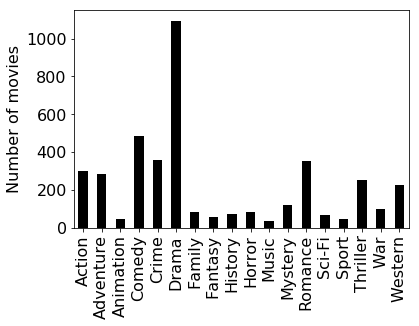

In [40]:
#q28
plot_dict(genres_full_count,"Number of movies")

In [41]:
years = sorted(list(bucketize(movies,"year").keys()))

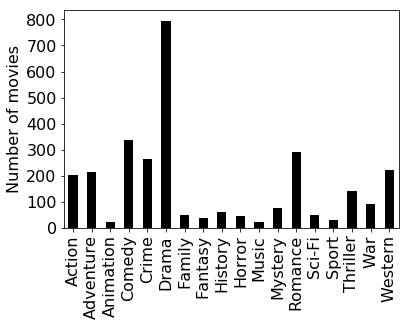

In [42]:
#q29
genres29 = {}
for genres in genres_full:
    for year in years[:years.index(2000)]:
        if genres in genres29:
            genres29[genres] += len(filter_movies_by_year(copy.deepcopy(genres_full[genres]),year))
        else:
            genres29[genres] = len(filter_movies_by_year(copy.deepcopy(genres_full[genres]),year))
plot_dict(genres29,"Number of movies")

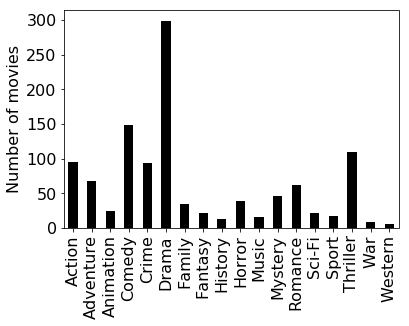

In [43]:
#q30
genres30 = {}
for genres in genres_full:
    for year in years[years.index(2000):]:
        if genres in genres30:
            genres30[genres] += len(filter_movies_by_year(copy.deepcopy(genres_full[genres]),year))
        else:
            genres30[genres] = len(filter_movies_by_year(copy.deepcopy(genres_full[genres]),year))
plot_dict(genres30,"Number of movies")

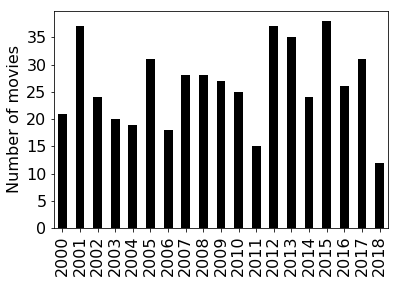

In [44]:
#q31
years_full = bucketize(movies,"year")
years31 = {}
for year in years[years.index(2000):]:
    years31[year] = len(years_full[year])
plot_dict(years31,"Number of movies")

In [45]:
def car_length(career):
    career_len = {}
    career_full = bucketize(movies, career)
    for people in career_full:
        career_len[people] = []
        for movie in career_full[people]:
            career_len[people].append(movie["year"])
        career_len[people] = max(career_len[people])-min(career_len[people])
    return career_len

In [46]:
#q32
dir_len = car_length("directors")
q32 = {}
for dirt in dir_len:
    if dir_len[dirt] >= 30:
        q32[dirt] = dir_len[dirt]
q32

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'Henry Hathaway': 36,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'Richard Fleischer': 32,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [47]:
#q33
act_len = car_length("actors")
q33 = {}
for dirt in act_len:
    if act_len[dirt] >= 40:
        q33[dirt] = act_len[dirt]
q33

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Dennis Quaid': 40,
 'Marlon Brando': 49,
 'Armand Assante': 40,
 'Eddie Albert': 41,
 'Jon Voight': 44,
 'Tony Curtis': 45,
 'Michael Constantine': 42,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Fredric March': 41,
 'Lloyd Bridges': 44,
 'Robert Redford': 44,
 'Dean Stockwell': 53}

In [48]:
def row_ranking(row):
    return row["span"]

In [49]:
#q34
dir_len = car_length("directors")
tendir = sorted(dir_len.values())[-10]
q34 = {}
for dirt in dir_len:
    if dir_len[dirt] >= tendir:
        q34[dirt] = dir_len[dirt]
a34 = []
for person in q34:
    a34.append({'name':person,'span':q34[person]})
sorted(a34,key=row_ranking,reverse=True)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31}]

In [50]:
#q35
dir_len = car_length("actors")
tendir = sorted(dir_len.values())[-10]
q34 = {}
for dirt in dir_len:
    if dir_len[dirt] >= tendir:
        q34[dirt] = dir_len[dirt]
a34 = []
for person in q34:
    a34.append({'name':person,'span':q34[person]})
sorted(a34,key=row_ranking,reverse=True)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [51]:
def dict_get_kind(dic,kind):
    kind_list = []
    for movie in dic:
        kind_list.append(movie[kind])
    return kind_list
def median(num_list):
    num_list.sort()
    if (len(num_list)%2 == 0):
        return (num_list[len(num_list)//2]+num_list[len(num_list)//2-1])/2
    else:
        return num_list[len(num_list) // 2]
def rank_by_rating(row):
    return row["rating"]
def q36(kind,filt = None):
    kind_full = bucketize(movies,kind)
    if (filt != None):
        kind_fil = {}
        for kind in kind_full:
            if len(kind_full[kind]) >= filt:
                kind_fil[kind] = kind_full[kind]
        kind_full = kind_fil
    result = []
    for kind in kind_full:
        here = dict_get_kind(kind_full[kind], "rating")
        result.append({'category':kind, 'rating':median(here), 'count':len(here)})
    return result

In [52]:
#q36
sorted(q36("genres"),key=rank_by_rating,reverse=True)[:3]

[{'category': 'Animation', 'rating': 7.3, 'count': 45},
 {'category': 'History', 'rating': 6.7, 'count': 73},
 {'category': 'War', 'rating': 6.7, 'count': 99}]

In [53]:
#q37
sorted(q36("year"),key=rank_by_rating,reverse=True)[:10]

[{'category': 1921, 'rating': 8.3, 'count': 1},
 {'category': 1925, 'rating': 8.2, 'count': 1},
 {'category': 1919, 'rating': 7.5, 'count': 1},
 {'category': 1923, 'rating': 7.3, 'count': 2},
 {'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17},
 {'category': 1963, 'rating': 6.95, 'count': 10}]

In [54]:
#q38
sorted(q36("year",10),key=rank_by_rating,reverse=True)[:5]

[{'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17}]

In [55]:
#q39
sorted(q36("directors",3),key=rank_by_rating,reverse=True)[:6]

[{'category': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'category': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'category': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'category': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'category': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'category': 'Andrew Grieve', 'rating': 8.2, 'count': 6}]

In [56]:
#q40
sorted(q36("actors",5),key=rank_by_rating,reverse=True)[:3]

[{'category': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'category': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'category': 'Robert Lindsay', 'rating': 8.2, 'count': 6}]